In [1]:
from os import listdir, mkdir, system
from os.path import isfile, isdir, join, exists
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import Sequential
from keras.layers import Conv1D, BatchNormalization, Dropout, MaxPooling1D, Flatten, Dense, LSTM
from keras.callbacks import EarlyStopping
import itertools

# fix random seed for reproducibility
np.random.seed(7)
fs = 300
input_dir = 'One_Hot_Data/'

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, name, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(name+'_confmat.png',dpi=250)
    plt.close()


## Loading Data and modelling

In [6]:
for f in listdir(input_dir):
    print (f.split(".")[0])
    df = pd.read_csv(join(input_dir,f), header=None)
    data = df.values
    X = data[:,:-4]
    X.shape
    X = X.reshape(-1, X.shape[1], 1)
    y = data[:,-4:]
    print (X.shape)
    print (y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, shuffle=True)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, shuffle=True)
    break

4
(61836, 1200, 1)
(61836, 4)


In [8]:
model = Sequential()

model.add(Conv1D(filters=5, kernel_size=(15), activation='relu', input_shape=(X.shape[1],1), 
                 padding='same', strides=1, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(LSTM(5))

model.add(Dense(5, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, batch_size=512, epochs=10, verbose=1, validation_data=(X_val, y_val), 
            callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=1)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1200, 5)           80        
_________________________________________________________________
batch_normalization_2 (Batch (None, 1200, 5)           20        
_________________________________________________________________
dropout_2 (Dropout)          (None, 1200, 5)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 600, 5)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 24        
Total para

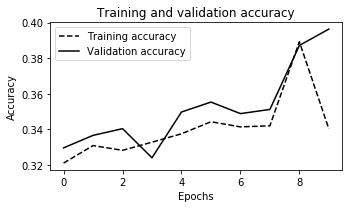

In [35]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
    plt.figure(figsize=(5,3))
    plt.plot(epochs, accuracy, 'k--', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'k', label='Validation accuracy')

    
    
plt.title('Training and validation accuracy')
    plt.figure(figsize=(5,3))
    plt.plot(epochs, loss, 'k--', label='Training loss')
    plt.plot(epochs, val_loss, 'k', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(f[0]+'_acc.png',dpi=100)
plt.show()

In [ ]:
    
    print (TP[0], ',', FP[0], ',', TN[0], ',', FN[0], ',', '{:.2f}%'.format(float(PPV[0]*100)), ',', '{:.2f}%'.format(float(ACC[0]*100)), ',', '{:.2f}%'.format(float(SEN[0]*100)), ',','{:.2f}%'.format(float(SPE[0]*100)), ',','{:.2f}%'.format(float(F1S[0]*100)), ',','{:.2f}%'.format(float(AUC[0]*100))
    print (TP[1], ',', FP[1], ',', TN[1], ',', FN[1], ',', '{:.2f}%'.format(float(PPV[1]*100)), ',', '{:.2f}%'.format(float(ACC[1]*100)), ',', '{:.2f}%'.format(float(SEN[1]*100)), ',','{:.2f}%'.format(float(SPE[1]*100)), ',','{:.2f}%'.format(float(F1S[1]*100)), ',','{:.2f}%'.format(float(AUC[1]*100))
    print (TP[2], ',', FP[2], ',', TN[2], ',', FN[2], ',', '{:.2f}%'.format(float(PPV[2]*100)), ',', '{:.2f}%'.format(float(ACC[2]*100)), ',', '{:.2f}%'.format(float(SEN[2]*100)), ',','{:.2f}%'.format(float(SPE[2]*100)), ',','{:.2f}%'.format(float(F1S[2]*100)), ',','{:.2f}%'.format(float(AUC[2]*100))


In [ ]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure(figsize=(8,4))
plt.plot(epochs, accuracy, 'k-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ko', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig(f[0]+'_acc.png',dpi=200)
plt.show()

plt.figure(figsize=(8,4))
    plt.plot(epochs, loss, 'k--', label='Training loss')
    plt.plot(epochs, val_loss, 'ko', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f[0]+'_loss.png',dpi=200)
plt.close()

model.save(f[0]+"_model.h5py")

new_y_pred = model.predict(X_test)
y_test_arg = np.argmax(np.round(y_test),axis=1)
y_pred_arg = np.argmax(np.round(new_y_pred),axis=1)
y_pred = np.zeros((new_y_pred.shape[0],new_y_pred.shape[1]))

from pycm import *
cm = ConfusionMatrix(actual_vector=y_test_arg, predict_vector=y_pred_arg)
totalt = cm.__dict__

TP = totalt['TP']
FP = totalt['FP']
TN = totalt['TN']
FN = totalt['FN']

PPV = totalt['PPV']
ACC = totalt['ACC']
SEN = totalt['TPR']
SPE = totalt['TNR']
F1S = totalt['F1']
AUC = totalt['AUC']

print ('TP,FP,TN,FN,Precision,Accuracy,Sensitivity,Specificity,F1Score,AUC')
print (TP[0], ',', FP[0], ',', TN[0], ',', FN[0], ',', '{:.2f}%'.format(PPV[0]*100), ',', '{:.2f}%'.format(ACC[0]*100), ',', '{:.2f}%'.format(SEN[0]*100), ',','{:.2f}%'.format(SPE[0]*100), ',','{:.2f}%'.format(F1S[0]*100), ',','{:.2f}%'.format(AUC[0]*100))
print (TP[1], ',', FP[1], ',', TN[1], ',', FN[1], ',', '{:.2f}%'.format(PPV[1]*100), ',','{:.2f}%'.format(ACC[1]*100), ',','{:.2f}%'.format(SEN[1]*100), ',','{:.2f}%'.format(SPE[1]*100), ',','{:.2f}%'.format(F1S[1]*100), ',','{:.2f}%'.format(AUC[1]*100))
print (TP[2], ',', FP[2], ',', TN[2], ',', FN[2], ',', '{:.2f}%'.format(PPV[2]*100), ',','{:.2f}%'.format(ACC[2]*100), ',','{:.2f}%'.format(SEN[2]*100), ',','{:.2f}%'.format(SPE[2]*100), ',','{:.2f}%'.format(F1S[2]*100), ',','{:.2f}%'.format(AUC[2]*100))


for i in range(y_pred.shape[0]):
    y_pred[i][y_pred_arg[i]] = 1

print (classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test_arg, y_pred_arg)

# Plot non-normalized confusion matrix
class_names = ['Normal','AFiB','Other', 'Noisy']
plt.figure(figsize=(8,5))
plot_confusion_matrix(cnf_matrix, name = f[0], classes=class_names, title='Confusion matrix')

In [ ]:
# model.add(Flatten())

# model.add(Dense(128, activation='relu'))
# model.add(Dense(y.shape[1], activation='softmax'))


# model.add(Conv2D(512, 3, strides=(32, 4), padding='same', input_shape=(1, 32, None)))
# model.add(Reshape((512, -1)))
# model.add(Permute((2, 1)))
# model = Sequential()
# model.add(LSTM(200, activation='relu', input_shape=(X.shape[1],1)))